In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Customer churn can be described as an event when customers decide to hault business with a particular company or service. This can also be coined as Customer Attrition where a brand looses minor/major customers due to a fault or lack of optimal services. This common in telecommunication as most users have alternative choices or decisions that fit their needs. Here we will be looking at some of the key causes of customers churning in this dataset.

In [2]:
# import dataset
df = pd.read_csv("C:/Users/DELL1/Assign ADS/ADS-Assignment-4/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
# check more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# display the names of all the columns present int he data
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# check for the number of rows and columns in the data
df.shape

(7043, 21)

In [6]:
# the last five rows in the data
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

From my observation, we have 7043 rows and 21 columns in the data as most of the columns are strings while column; SeniorCitizen and Tenure are integers with MonthlyCharges as float. However, TotalCharges in this case should not be a string because it contains numbers. Hence, I will convert the column(TotalCharges) from string to float just to avoid errors and make my analysis precise.

In [7]:
# convert "TotalCharges" from string to float in the data
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [8]:
# show the number of males and females in the data
df.groupby("gender")["MonthlyCharges"].count().reset_index()

gender  MonthlyCharges
0  Female            3488
1    Male            3555

In [9]:
# distribution of the number of males and females in the data 
fig = px.histogram(df, x="MonthlyCharges",color="gender", nbins=20, title="Distribution of MonthlyCharges by Gender")

fig.show()

From the distribution above, we observed that the data is not normally distributed and obviously the males dominated the females in their purchase of different telecommunication services.

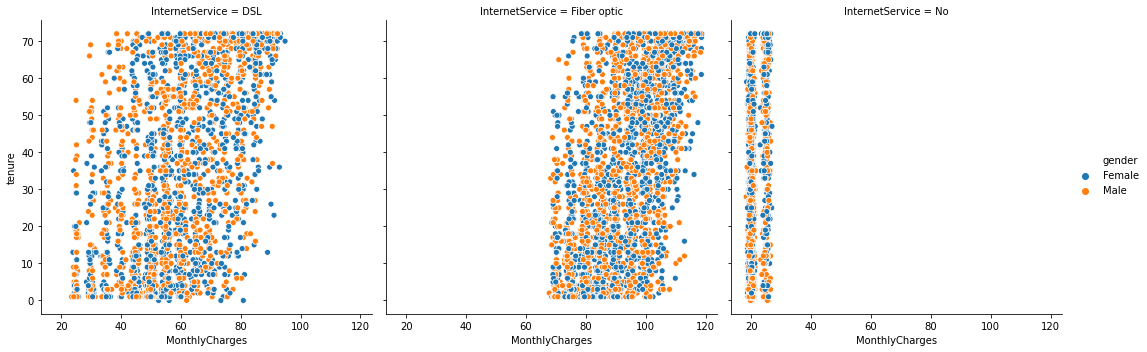

In [10]:
# distribution of MonthlyCharges by Tenure and Internet Service for male and female
sns.relplot(x="MonthlyCharges", y="tenure", hue="gender", data=df,col="InternetService")
plt.show()

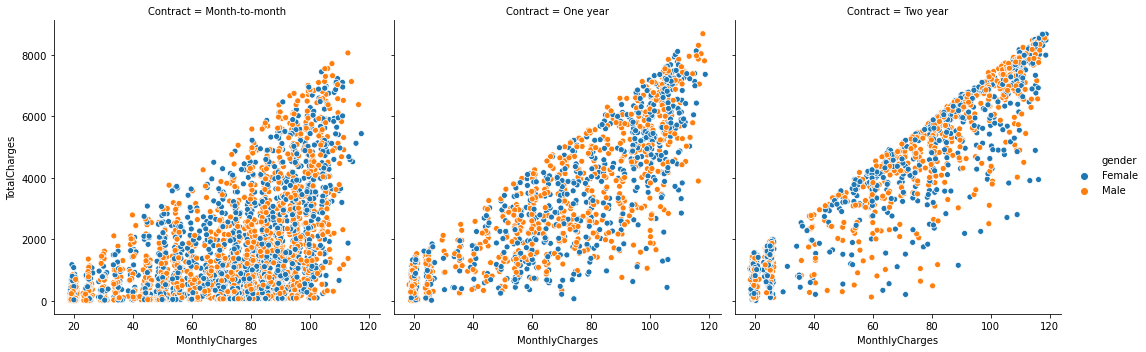

In [11]:
sns.relplot(x="MonthlyCharges", y="TotalCharges", hue="gender", data=df,col="Contract")
plt.show()

I also compared the Monthly Charges to the Total Charges of different subscribers(male & female) according to their individual selected plan. This uncovered that most users prefer the One-off(Basic) plan compared to One-year(Plus) and Two-year(Prenium) plans. This will keep customers from churning as Plus and Prenium plans might be too expensive for them to afford regularly due to their income weight.

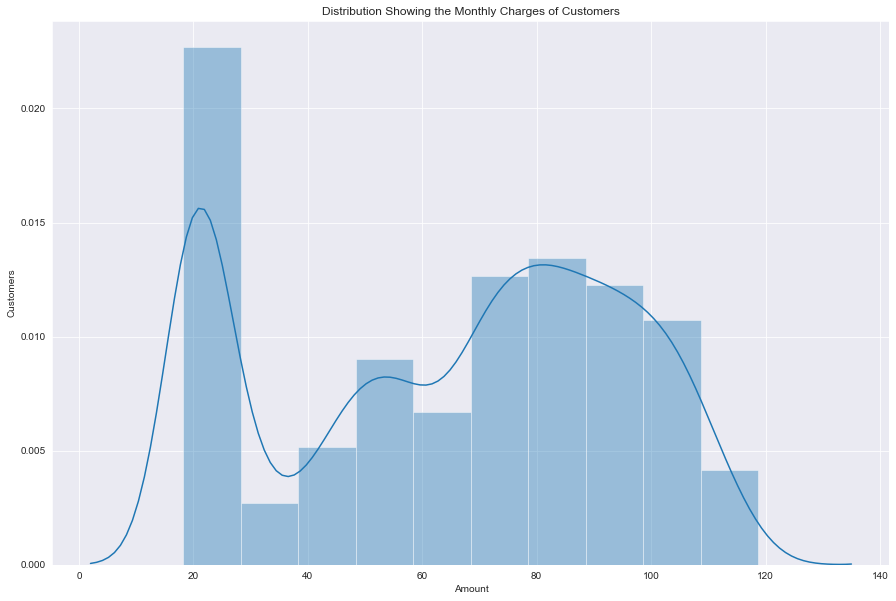

In [12]:
# distribution of the Monthly Charges in the dataset
sns.set_style('darkgrid')

# plot 
plt.figure(figsize=(15,10))
sns.distplot(df["MonthlyCharges"], bins=10)
plt.title("Distribution Showing the Monthly Charges of Customers")
plt.xlabel("Amount")
plt.ylabel("Customers")
plt.show()

The plot from the figure above does not indicate that the data follows a Normal Distribution. It shows an irregular movement that is the rise and fall of amount subscribed by the customers. Maybe due to expenses, change or service providers,bouquet plan, insatiability or flunctuation of price exchange.

In [13]:
# number of customers who partner with a telecommunication company
df_partner = df["Partner"].value_counts().reset_index()
df_partner

index  Partner
0    No     3641
1   Yes     3402

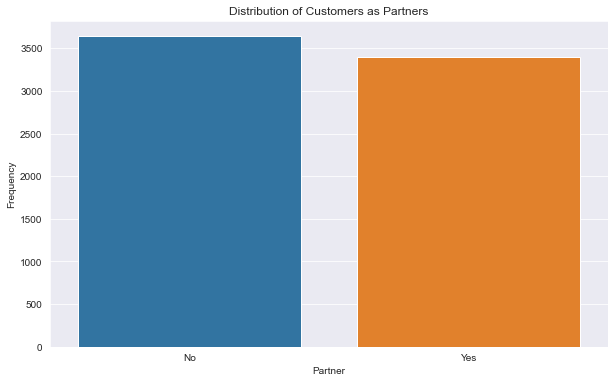

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x="index", y="Partner", data=df_partner)
plt.title("Distribution of Customers as Partners")
plt.xlabel("Partner")
plt.ylabel("Frequency")
plt.show()

In [15]:
# number of customers who used the phone service
df_phoneservice = df["PhoneService"].value_counts().reset_index()
df_phoneservice

index  PhoneService
0   Yes          6361
1    No           682

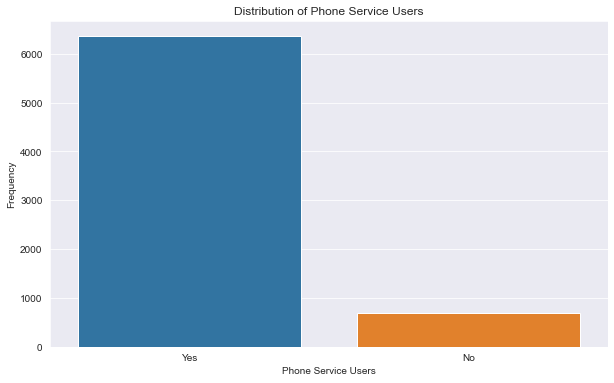

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x="index", y="PhoneService", data=df_phoneservice)
plt.title("Distribution of Phone Service Users")
plt.xlabel("Phone Service Users")
plt.ylabel("Frequency")
plt.show()

In [17]:
# number of customers who subscribed to the different internet service providers
df_internetserv = df["InternetService"].value_counts().reset_index()
df_internetserv

index  InternetService
0  Fiber optic             3096
1          DSL             2421
2           No             1526

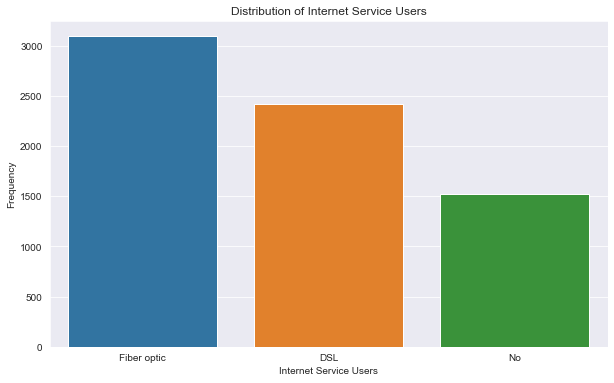

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x="index", y="InternetService", data=df_internetserv)
plt.title("Distribution of Internet Service Users")
plt.xlabel("Internet Service Users")
plt.ylabel("Frequency")
plt.show()

The above figure shows the distribution of Internet users. It has been categorically shown that Fiber optic has the highest number of users followed by DSL. Also some users preferred not to subscribe to any of both service.

In [19]:
# number of customers according to the contract subscribed to
df_contract = df["Contract"].value_counts().reset_index()
df_contract

index  Contract
0  Month-to-month      3875
1        Two year      1695
2        One year      1473

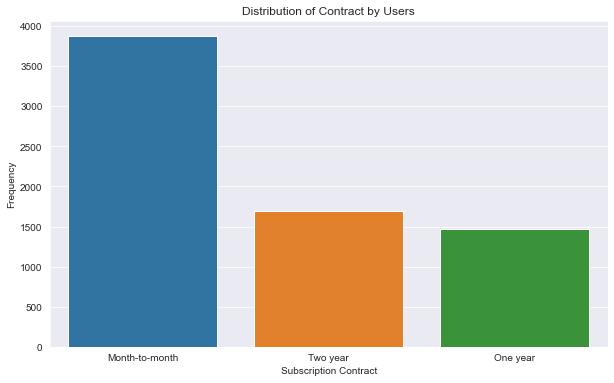

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x="index", y="Contract", data=df_contract)
plt.title("Distribution of Contract by Users")
plt.xlabel("Subscription Contract")
plt.ylabel("Frequency")
plt.show()

It was shown in the figure above that customers were more comfortable subscribing to the Basic (Month-to-month) plan compared to the Two years(Plus) and One year(Premium) plans.

In [21]:
# number of customers who prefer paperless billings to those who don't
df_paperless = df["PaperlessBilling"].value_counts().reset_index()
df_paperless

index  PaperlessBilling
0   Yes              4171
1    No              2872

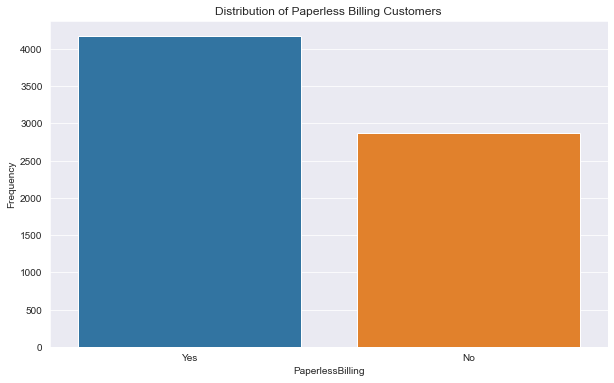

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x="index", y="PaperlessBilling", data=df_paperless)
plt.title("Distribution of Paperless Billing Customers")
plt.xlabel("PaperlessBilling")
plt.ylabel("Frequency")
plt.show()

As shown above, after critical observation; customers prefer paperless billing from the internet/service providers as it is more convenient. Also, it saves customers from extra charges from the service providers.

In [23]:
# calculating the total amount of customers who partnered paid to those who didn't
df.groupby("Partner")["MonthlyCharges"].sum().reset_index()

Partner  MonthlyCharges
0      No       225541.75
1     Yes       230574.85

In [24]:
# calculate the total amount customers who subscribed to each internet service paid
df_inter_month = df.groupby("InternetService")["MonthlyCharges"].sum().reset_index()
df_inter_month

InternetService  MonthlyCharges
0             DSL       140665.35
1     Fiber optic       283284.40
2              No        32166.85

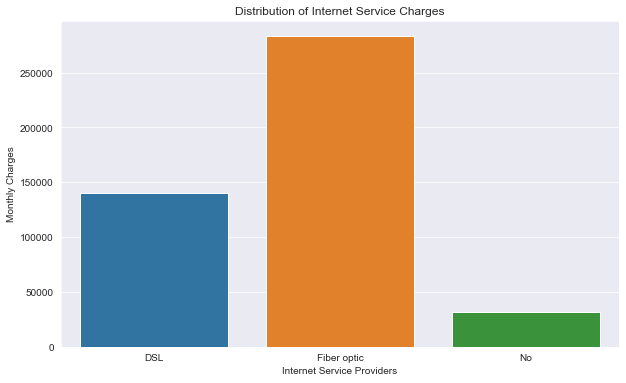

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x="InternetService", y="MonthlyCharges", data=df_inter_month)
plt.title("Distribution of Internet Service Charges")
plt.xlabel("Internet Service Providers")
plt.ylabel("Monthly Charges")
plt.show()

From the descriptive analysis shown above, Fiber optic has the highest amount of monthly charge compared to DSL with a difference of 142,619.05. While subscribers with no interest of using both networks arrived at a total charge of 32,166.85.

In [26]:
# number of customers according to the payment method used
df_payment = df.groupby("PaymentMethod")["MonthlyCharges"].count().reset_index()
df_payment

PaymentMethod  MonthlyCharges
0  Bank transfer (automatic)            1544
1    Credit card (automatic)            1522
2           Electronic check            2365
3               Mailed check            1612

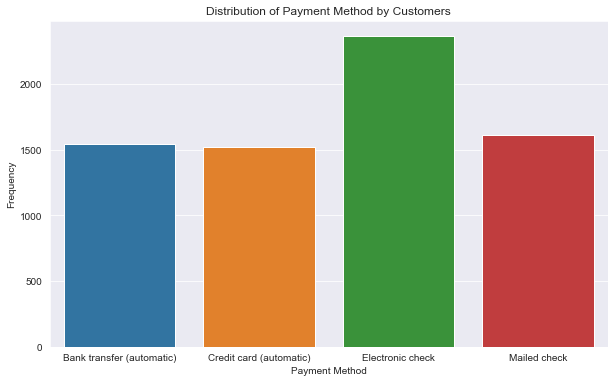

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x="PaymentMethod", y="MonthlyCharges", data=df_payment)
plt.title("Distribution of Payment Method by Customers")
plt.xlabel("Payment Method")
plt.ylabel("Frequency")
plt.show()

It was obvious that customers prefer Electronic check to mail check, bank transfer and credit card. Probably because of the flexibility and less charges during payment. Hence, telecommunication companies should look into that medium to extend their customer base.

In [28]:
# calculate the total amount customers paid via payment method
df.groupby("PaymentMethod")["MonthlyCharges"].sum().reset_index()

PaymentMethod  MonthlyCharges
0  Bank transfer (automatic)       103745.45
1    Credit card (automatic)       101231.85
2           Electronic check       180345.00
3               Mailed check        70794.30

In [29]:
# calculate the mean of the Monthly Charges made from all telecommunication company
df["MonthlyCharges"].mean()

64.76169246059922

In [30]:
# calculate the mean of the Total Charges made from all telecommunication company
df["TotalCharges"].mean()

2283.3004408418697

In [31]:
# number of customers by gender who partnered and used the phone service
df.groupby(["gender","Partner"])["PhoneService"].count().reset_index()

gender Partner  PhoneService
0  Female      No          1800
1  Female     Yes          1688
2    Male      No          1841
3    Male     Yes          1714

In [34]:
# number of customers by gender who used the various internet service as a partner
df.groupby(["gender","InternetService"])["Partner"].count().reset_index()

gender InternetService  Partner
0  Female             DSL     1188
1  Female     Fiber optic     1553
2  Female              No      747
3    Male             DSL     1233
4    Male     Fiber optic     1543
5    Male              No      779

In [35]:
# number of customers by gender who subscribed by contract to internet service
df.groupby(["gender","Contract"])["InternetService"].count().reset_index()

gender        Contract  InternetService
0  Female  Month-to-month             1925
1  Female        One year              718
2  Female        Two year              845
3    Male  Month-to-month             1950
4    Male        One year              755
5    Male        Two year              850

In [36]:
# number of customers by gender who prefer paperless billing for internet service
df.groupby(["gender","PaperlessBilling"])["InternetService"].count().reset_index()

gender PaperlessBilling  InternetService
0  Female               No             1402
1  Female              Yes             2086
2    Male               No             1470
3    Male              Yes             2085

In [37]:
# number of customers by gender churn the internet service
df.groupby(["gender","Churn"])["InternetService"].count().reset_index()

gender Churn  InternetService
0  Female    No             2549
1  Female   Yes              939
2    Male    No             2625
3    Male   Yes              930

In [38]:
# number of customers according to contracts for phone service
df.groupby("Contract")["PhoneService"].count().reset_index()

Contract  PhoneService
0  Month-to-month          3875
1        One year          1473
2        Two year          1695

In [39]:
# total monthly charges for customers who prefer paperless billing to those who don't
df.groupby("PaperlessBilling")["MonthlyCharges"].sum().reset_index()

PaperlessBilling  MonthlyCharges
0               No        149323.8
1              Yes        306792.8

In [40]:
# comparison of the monthly charges to total charges in male
male_monthlycharges=df[df["gender"].isin(["Male"])]
male_monthlycharges[["gender","MonthlyCharges","TotalCharges"]].head()

gender  MonthlyCharges  TotalCharges
1   Male           56.95       1889.50
2   Male           53.85        108.15
3   Male           42.30       1840.75
6   Male           89.10       1949.40
9   Male           56.15       3487.95

In [41]:
# analysis showing the total charges, mean, minimum and maximum amount of male customers monthly
male_collection = male_monthlycharges.loc[:,["gender","MonthlyCharges"]]
male_collection.agg({"MonthlyCharges":["sum","mean","max","min"]})

MonthlyCharges
sum    228684.200000
mean       64.327482
max       118.350000
min        18.250000

In [42]:
# analysis showing the total charges, mean, minimum and maximum amount of male customers totally
male_collection = male_monthlycharges.loc[:,["gender","MonthlyCharges","TotalCharges"]]
male_collection.agg({"TotalCharges":["sum","mean","max","min"]})

TotalCharges
sum   8.103815e+06
mean  2.283408e+03
max   8.684800e+03
min   1.880000e+01

In [43]:
# comparison of the monthly charges to total charges in male
female_monthlycharges=df[df["gender"].isin(["Female"])]
female_monthlycharges[["gender","MonthlyCharges","TotalCharges"]].head()

gender  MonthlyCharges  TotalCharges
0  Female           29.85         29.85
4  Female           70.70        151.65
5  Female           99.65        820.50
7  Female           29.75        301.90
8  Female          104.80       3046.05

In [44]:
# analysis showing the total charges, mean, minimum and maximum amount of female customers monthly
female_collection = female_monthlycharges.loc[:,["gender","MonthlyCharges"]]
female_collection.agg({"MonthlyCharges":["sum","mean","min","max"]})

MonthlyCharges
sum    227432.400000
mean       65.204243
min        18.400000
max       118.750000

In [45]:
# analysis showing the total charges, mean, minimum and maximum amount of female customers totally
female_collection = female_monthlycharges.loc[:,["gender","MonthlyCharges","TotalCharges"]]
female_collection.agg({"TotalCharges":["sum","mean","min","max"]})

TotalCharges
sum   7.952354e+06
mean  2.283191e+03
min   1.885000e+01
max   8.672450e+03

In [46]:
# aggregate amount of basic(month-to-month) plan for customers monthly
monthly_contract = df[df["Contract"].isin(["Month-to-month"])]
monthly_contract.agg({"MonthlyCharges":["sum","mean","max","min"]})

MonthlyCharges
sum     257294.15000
mean        66.39849
max        117.45000
min         18.75000

In [47]:
# aggregate amount of plus(One year) plan for customers monthly charges
yearly_contract = df[df["Contract"].isin(["One year"])]
yearly_contract.agg({"MonthlyCharges":["sum","mean","max","min"]})

MonthlyCharges
sum     95816.600000
mean       65.048608
max       118.600000
min        18.250000

In [48]:
# aggregate amount of premium(Two year) plan for customers monthly charges
two_year_contract = df[df["Contract"].isin(["Two year"])]
two_year_contract.agg({"MonthlyCharges":["sum","mean","max","min"]})

MonthlyCharges
sum    103005.850000
mean       60.770413
max       118.750000
min        18.400000

In [49]:
# aggregate amount of basic(month-to-month) plan for customers total charges
monthly_contract = df[df["Contract"].isin(["Month-to-month"])]
monthly_contract.agg({"TotalCharges":["sum","mean","max","min"]})

TotalCharges
sum   5.305862e+06
mean  1.369255e+03
max   8.061500e+03
min   1.885000e+01

In [50]:
# aggregate amount of plus(One year) plan for customers total charges
yearly_contract = df[df["Contract"].isin(["One year"])]
yearly_contract.agg({"TotalCharges":["sum","mean","max","min"]})

TotalCharges
sum   4.467054e+06
mean  3.034683e+03
max   8.684800e+03
min   1.880000e+01

In [51]:
# aggregate amount of premium(Two year) plan for customers monthly charges
two_year_contract = df[df["Contract"].isin(["Two year"])]
two_year_contract.agg({"TotalCharges":["sum","mean","max","min"]})

TotalCharges
sum   6.283254e+06
mean  3.728934e+03
max   8.672450e+03
min   2.035000e+01

In conclusion: Fiber optic is more popular in terms of customer patronage and fan base, however they should target male subscribers because they spend more time using phones unlike female, not necessarily parners that subscribes on a monthly base and make payments electronically. Also introducing more benefits like bonuses and jumbo plan to attract more customers to the company. This will indeed prevent customers from churning and increase the profit margin of telecommunication industry over time.